In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
file_path = "user_payment_precleaned(1).csv"  

df = pd.read_csv(file_path)

print(df.head())


Далі ми зосереджуємось на дослідженні банків. Тому ми вирішили вивести топ 10 країн за кількістю усіх зроблених транзакцій.

<Figure size 1200x600 with 0 Axes>

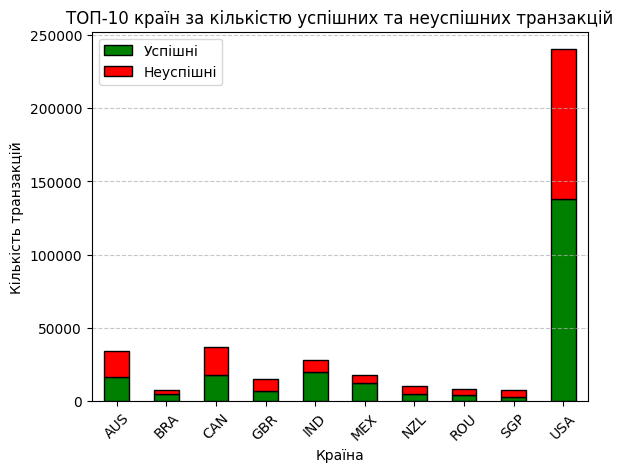

In [ ]:
top_countries = df["card_country"].value_counts().head(10).index
country_status_counts = df[df["card_country"].isin(top_countries)].groupby(["card_country", "transaction_status"]).size().unstack()

plt.figure(figsize=(12, 6))
country_status_counts.plot(kind="bar", stacked=True, color=["green", "red"], edgecolor="black")

plt.xlabel("Країна")
plt.ylabel("Кількість транзакцій")
plt.title("ТОП-10 країн за кількістю успішних та неуспішних транзакцій")
plt.xticks(rotation=45)
plt.legend(["Успішні", "Неуспішні"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [ ]:
import pandas as pd


df_success = df[df["transaction_status"] == 1].copy()

country_counts = (
    df_success
    .groupby("card_country")
    .size()
    .reset_index(name="count_success")
)

fig = px.choropleth(
    country_counts,
    locations="card_country",    
    color="count_success",     
    hover_name="card_country",          
    color_continuous_scale="Viridis",
    title="Кількість успішних оплат по країнах",
    labels={"count_success": "Успішні транзакції"}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


Based on numerical and visual results, we found that the largest number of transactions is concentrated in the U.S. We noticed a very interesting case that half of all transactions are rejected.

In [ ]:
top_10_banks = df["bank_name"].value_counts().head(10)

print("TOP-10 most popular banks by number of transactions:")
print(top_10_banks)

ТОП-10 найпопулярніших банків за кількістю транзакцій:
bank_name
SUTTON BANK                                     29352
JPMORGAN CHASE BANK N.A. - DEBIT                15161
BANK OF AMERICA, NATIONAL ASSOCIATION           15144
THE BANCORP BANK                                14651
WELLS FARGO BANK, NATIONAL ASSOCIATION          12885
COMMONWEALTH BANK OF AUSTRALIA                  12178
STRIDE BANK, NATIONAL ASSOCIATION                9502
CAPITAL ONE BANK (USA), NATIONAL ASSOCIATION     6941
THE TORONTO-DOMINION BANK                        6777
JPMORGAN CHASE BANK N.A.                         6342
Name: count, dtype: int64


Next step: we look at the most popular banks in the world by number of transactions.

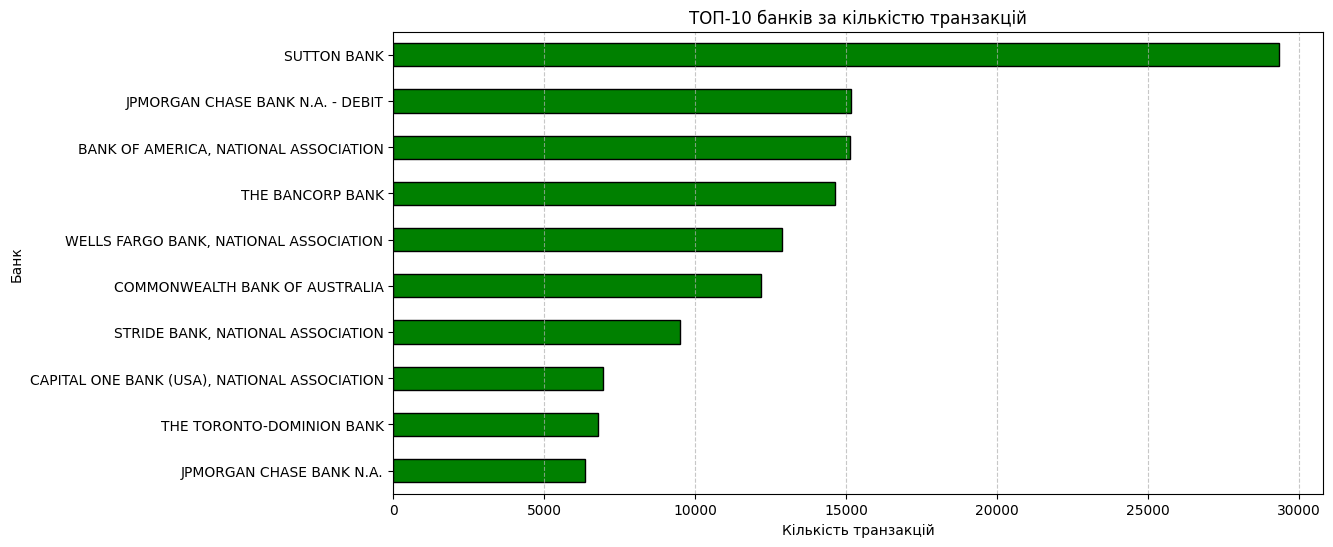

In [ ]:
plt.figure(figsize=(12, 6))
top_10_banks.sort_values().plot(kind="barh", color="green", edgecolor="black")

plt.title("ТОП-10 банків за кількістю транзакцій")
plt.xlabel("Кількість транзакцій")
plt.ylabel("Банк")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [ ]:
failed_transactions = df[df["transaction_status"] == 0]

top_failed_banks = failed_transactions["bank_name"].value_counts().head(10)

print(top_failed_banks)

bank_name
SUTTON BANK                               24891
THE BANCORP BANK                          10620
STRIDE BANK, NATIONAL ASSOCIATION          7172
COMMONWEALTH BANK OF AUSTRALIA             5804
BANK OF AMERICA, NATIONAL ASSOCIATION      5617
WELLS FARGO BANK, NATIONAL ASSOCIATION     5304
JPMORGAN CHASE BANK N.A. - DEBIT           4787
METABANK                                   4262
BBVA BANCOMER S.A.                         3978
THE TORONTO-DOMINION BANK                  3951
Name: count, dtype: int64


Next step: we look at the most popular banks in the world by the number of failed transactions.

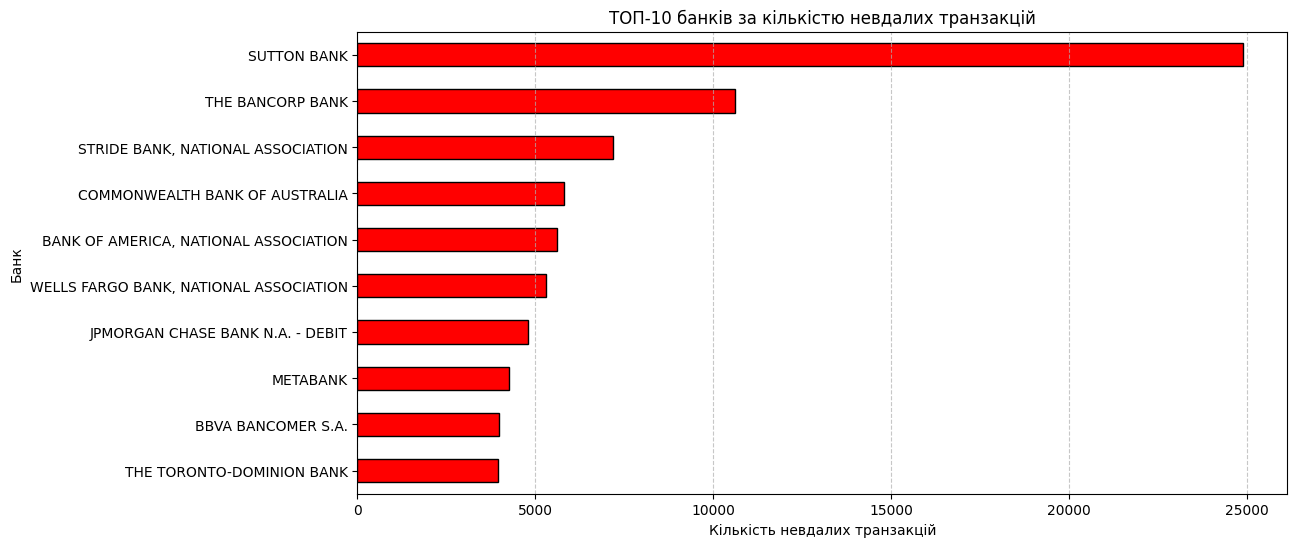

In [ ]:
plt.figure(figsize=(12, 6))
top_failed_banks.sort_values().plot(kind="barh", color="red", edgecolor="black")

plt.xlabel("Кількість невдалих транзакцій")
plt.ylabel("Банк")
plt.title("ТОП-10 банків за кількістю невдалих транзакцій")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

Next, we list the countries that have these most popular banks.

In [ ]:
top_failed_banks = failed_transactions["bank_name"].value_counts().head(10).index

failed_top_banks = failed_transactions[failed_transactions["bank_name"].isin(top_failed_banks)]

bank_to_country = (
    failed_top_banks.groupby("bank_name")["card_country"]
    .agg(lambda x: x.value_counts().idxmax()) 
)

print(bank_to_country)

bank_name
BANK OF AMERICA, NATIONAL ASSOCIATION     USA
BBVA BANCOMER S.A.                        MEX
COMMONWEALTH BANK OF AUSTRALIA            AUS
JPMORGAN CHASE BANK N.A. - DEBIT          USA
METABANK                                  USA
STRIDE BANK, NATIONAL ASSOCIATION         USA
SUTTON BANK                               USA
THE BANCORP BANK                          USA
THE TORONTO-DOMINION BANK                 CAN
WELLS FARGO BANK, NATIONAL ASSOCIATION    USA
Name: card_country, dtype: object


An interesting fact is that 7 of the 10 most popular banks are located in the USA.

And we visualize the ratio of successful and unsuccessful transactions in the TOP-10 banks.

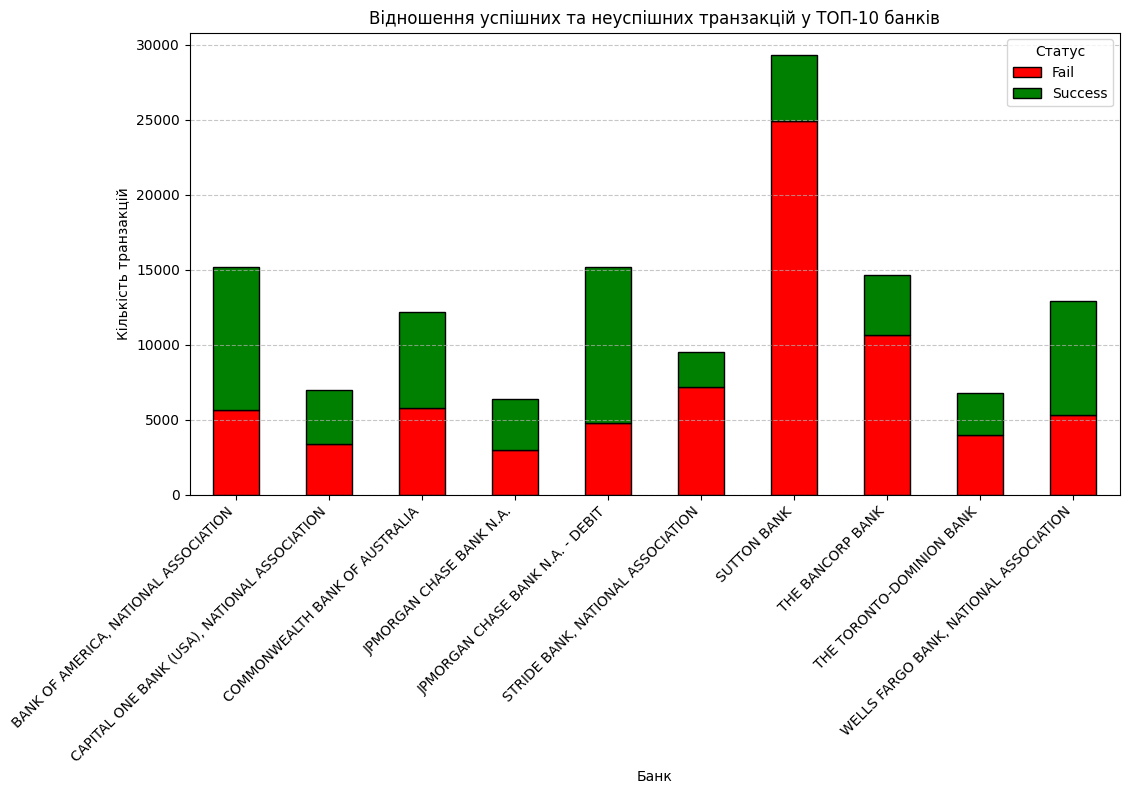

In [ ]:
top_10_banks = df["bank_name"].value_counts().head(10).index

top_banks_data = df[df["bank_name"].isin(top_10_banks)]

status_counts = top_banks_data.groupby(["bank_name", "transaction_status"]).size().unstack(fill_value=0)

status_counts.plot(kind="bar", stacked=True, figsize=(12, 6), color=["red", "green"], edgecolor="black")
plt.title("Відношення успішних та неуспішних транзакцій у ТОП-10 банків")
plt.xlabel("Банк")
plt.ylabel("Кількість транзакцій")
plt.xticks(rotation=45, ha="right")
plt.legend(["Fail", "Success"], title="Статус")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

We discovered an interesting fact and found the most popular bank - it is SUTTON BANK, which is located in the USA. It has a record number of rejected transactions.

In [ ]:
sutton_bank = df[df["bank_name"] == "SUTTON BANK"]

sutton_transactions = sutton_bank["transaction_status"].value_counts()

print("Кількість успішних і неуспішних транзакцій у Sutton Bank:")
print(sutton_transactions)

Кількість успішних і неуспішних транзакцій у Sutton Bank:
transaction_status
0    24891
1     4461
Name: count, dtype: int64


Next, we formed the following case study: why does this bank have such a high ratio of rejected transactions to successful ones?
Number of unsuccessful - 24,891, successful - 4,461, Total -29,352, 85% unsuccessful

In [ ]:

sutton_data = df[df["bank_name"] == "SUTTON BANK"]

card_type_counts = sutton_data.groupby(["card_type", "transaction_status"]).size().unstack(fill_value=0)

card_type_counts.plot(kind="bar", stacked=True, figsize=(10, 5), color=["red", "green"], edgecolor="black")
plt.title("Successful and Unsuccessful transactions in  Sutton Bank by card type")
plt.xlabel("Card type")
plt.ylabel("Transactions")
plt.xticks(rotation=45, ha="right")
plt.legend(["Fail", "Success"], title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'user_payment_precleaned (1).csv'

In [ ]:
print("Кількість успішних та неуспішних транзакцій у Sutton Bank за типами карток:")
print(card_type_counts)

Кількість успішних та неуспішних транзакцій у Sutton Bank за типами карток:
transaction_status      0     1
card_type                      
CREDIT                151    62
DEBIT                 790   103
PREPAID             23950  4296


Next, we decided to look at what type of card customers from this bank use to pay. We found that at this bank, almost all cards used in transactions are PREPAID and most of them are rejected.


At this stage, we delve into transactions made through SUTTON BANK and identify the most popular errors in transactions at this bank.
And the most popular error in such transactions 3.1 is a block from the bank.

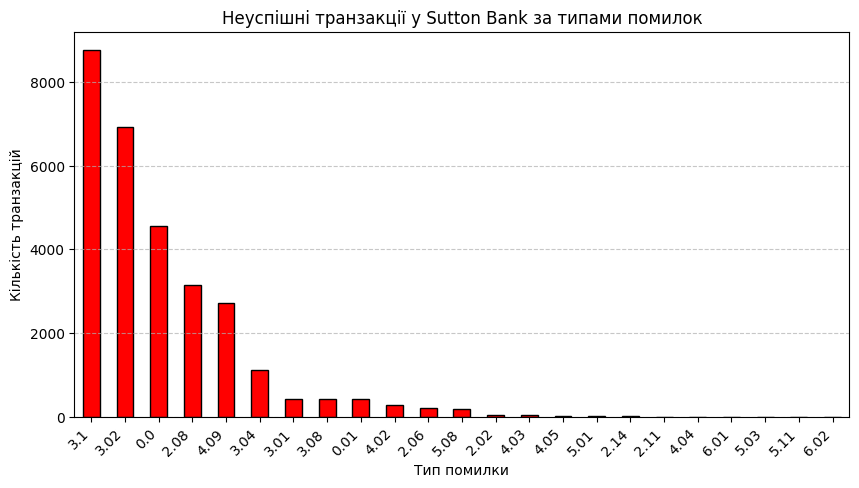

In [ ]:
error_type_counts = sutton_data["error_type"].value_counts()

plt.figure(figsize=(10, 5))
error_type_counts.plot(kind="bar", color="red", edgecolor="black")
plt.title("Неуспішні транзакції у Sutton Bank за типами помилок")
plt.xlabel("Тип помилки")
plt.ylabel("Кількість транзакцій")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Next, we dive deeper into the study of Prepaid cards.
A prepaid card is a payment card that is topped up in advance and used to pay until the balance is exhausted. It is not tied to a bank account, unlike debit or credit cards.

Features of prepaid cards:
Prepaid top-up - the owner first deposits funds and then spends them.
Limited balance - it is impossible to exceed the available amount.
Often does not support credit transactions - they cannot be used for overdrafts or credit purchases.
Popular for online payments - provide an additional layer of security.
May have restrictions - some stores or services do not accept prepaid cards, especially for subscriptions or rentals.

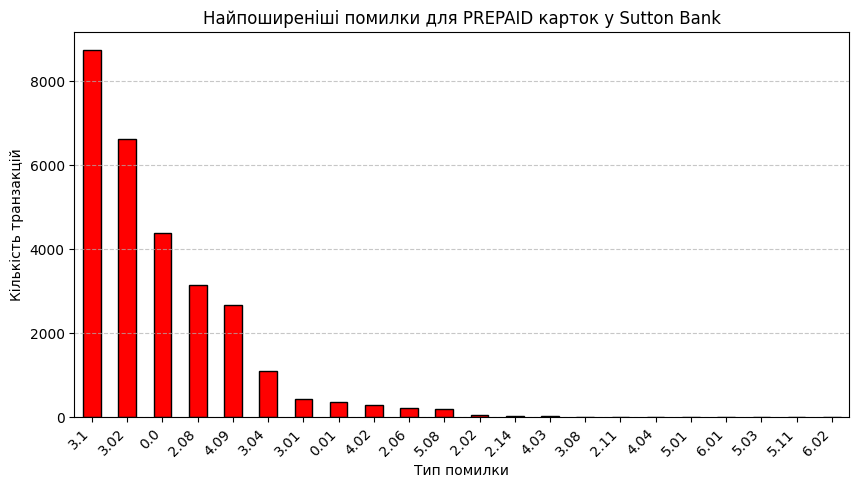

In [ ]:
sutton_prepaid = df[(df["bank_name"] == "SUTTON BANK") & (df["card_type"] == "PREPAID")]

prepaid_error_counts = sutton_prepaid["error_type"].value_counts()

plt.figure(figsize=(10, 5))
prepaid_error_counts.plot(kind="bar", color="red", edgecolor="black")
plt.title("Найпоширеніші помилки для PREPAID карток у Sutton Bank")
plt.xlabel("Тип помилки")
plt.ylabel("Кількість транзакцій")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Why does error 3.1 “card blocked” occur when paying with a prepaid card? Very often, these cards have limits set and if this limit is exceeded, the bank blocks it if it exceeds

We divide our payments into initial (which means this is the first payment) and recurrent (recurring). And here we can notice that with the first payment, the error "card blocked" most often occurs. And with a repeated payment, the error is that there are not enough funds on the card for payment.

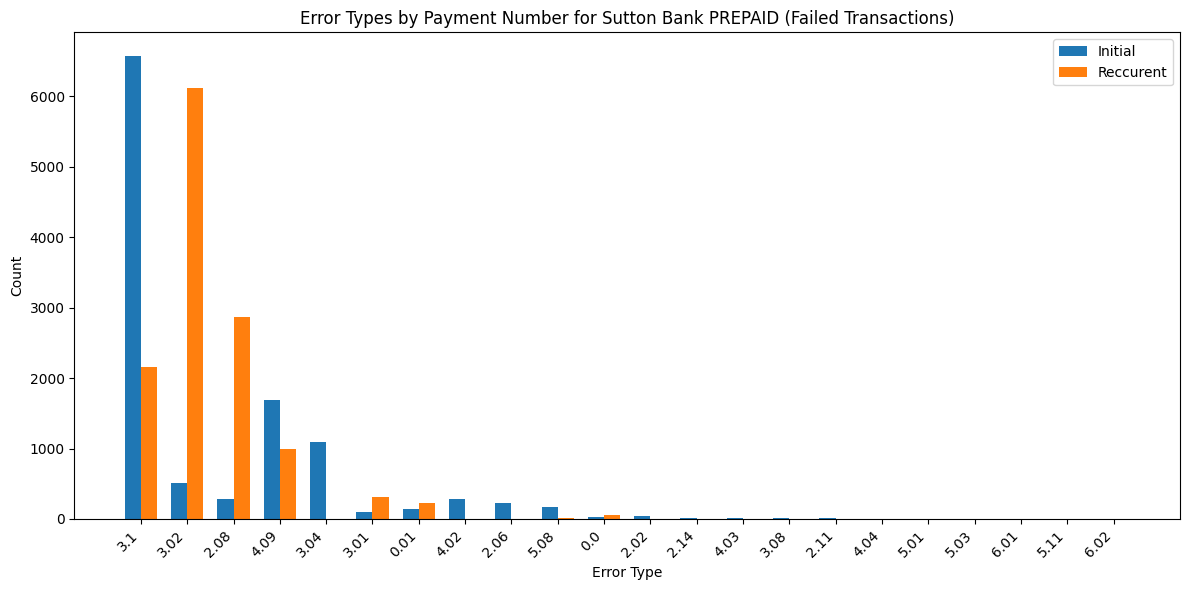

In [ ]:
sutton_prepaid = df[
    (df["bank_name"].str.upper() == "SUTTON BANK") &
    (df["card_type"].str.upper() == "PREPAID")
]

sutton_failed = sutton_prepaid[sutton_prepaid["transaction_status"] == 0]

pivot = (
    sutton_failed
    .groupby(["error_type", "payment_number"])
    .size()
    .unstack(fill_value=0)
)

pivot["total"] = pivot.sum(axis=1)
pivot = pivot.sort_values("total", ascending=False).drop(columns="total")

labels = pivot.index.astype(str)
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, pivot.get("initial", 0), width, label="Initial")
plt.bar(x + width/2, pivot.get("reccurent", 0), width, label="Reccurent")

plt.title("Error Types by Payment Number for Sutton Bank PREPAID (Failed Transactions)")
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.xticks(x, labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

The result of this study is that most of the cards of this bank are PREPAID type, which are absolutely unreliable for subsequent payments and subscription collection, since 85% of transactions were unsuccessful. Therefore, it is worth paying attention to a fairly large part of transactions that go through an unreliable bank.

Then we decided to look at all the unsuccessful transactions by card type and found that in fact the most rejected transactions were made with DEBIT cards.

Кількість неуспішних транзакцій за типами карт:
card_type
DEBIT             201258
CREDIT             67834
PREPAID            43450
Unknown              754
CREDIT/DEBIT         342
DEFERRED DEBIT       284
CHARGE CARD            2
Name: count, dtype: int64


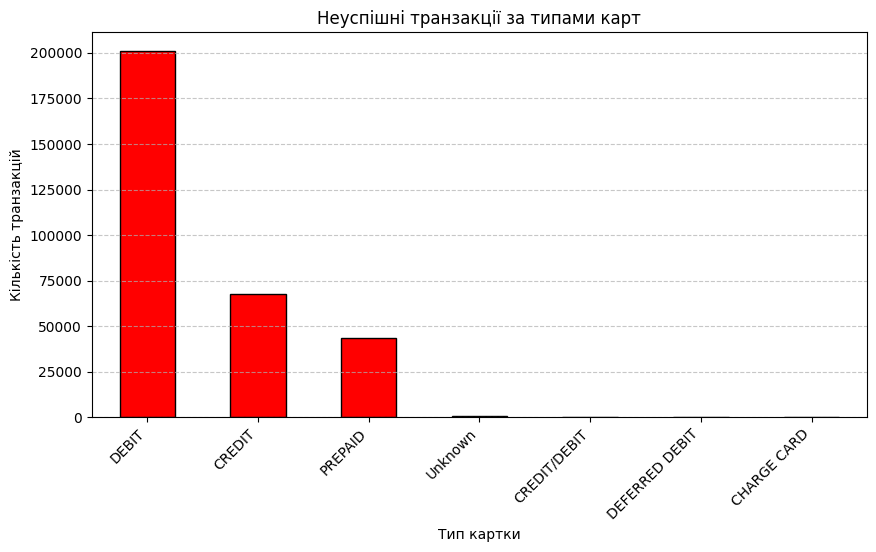

In [ ]:
failed_by_card_type = failed_transactions["card_type"].value_counts()

print("Кількість неуспішних транзакцій за типами карт:")
print(failed_by_card_type)

plt.figure(figsize=(10, 5))
failed_by_card_type.plot(kind="bar", color="red", edgecolor="black")
plt.title("Неуспішні транзакції за типами карт")
plt.xlabel("Тип картки")
plt.ylabel("Кількість транзакцій")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

The most common mistake when making recurring debit card payments is not having enough funds in your account to make the purchase.

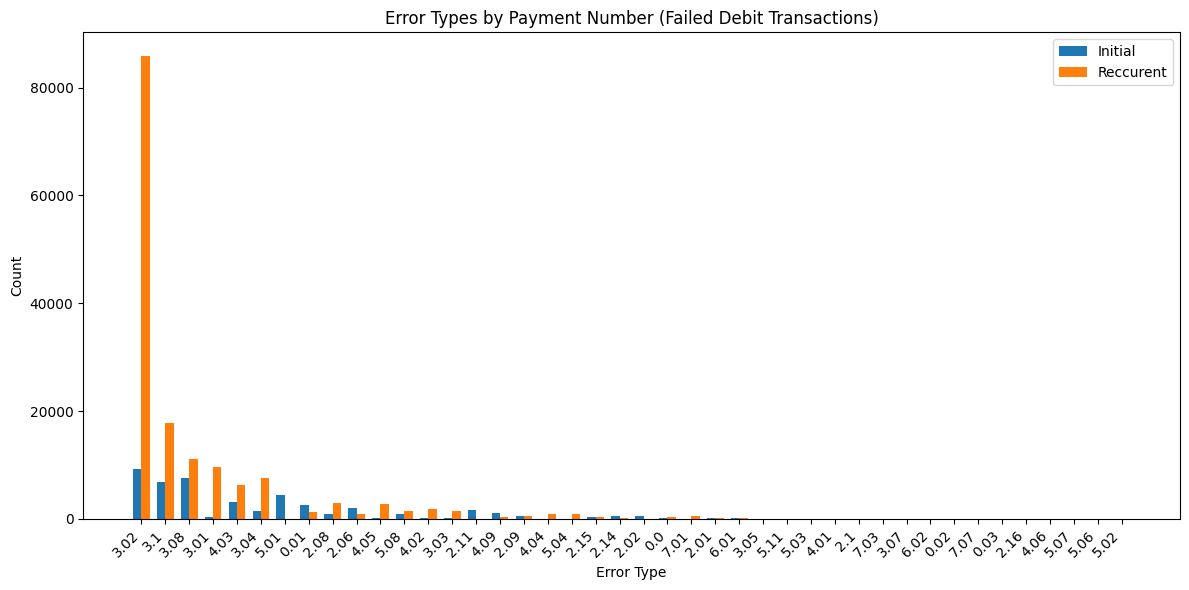

In [ ]:
df_failed_debit = df[(df['transaction_status'] == 0) & (df['card_type'].str.upper() == 'DEBIT')]

pivot = (
    df_failed_debit
    .groupby(['error_type', 'payment_number'])
    .size()
    .unstack(fill_value=0)
)

pivot['total'] = pivot.sum(axis=1)
pivot = pivot.sort_values('total', ascending=False).drop(columns='total')

labels = pivot.index.astype(str)
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, pivot.get('initial', 0), width, label='Initial')
plt.bar(x + width/2, pivot.get('reccurent', 0), width, label='Reccurent')

plt.title('Error Types by Payment Number (Failed Debit Transactions)')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Fact: The largest number of rejected transactions are with DEBIT cards
Theory: That the largest number of errors in transactions using DEBIT cards is the “insufficient funds” error type. Confirmed
Task: In which banks are the most common rejections with debit cards and in which countries
The bankcorp bank - the largest number of failures

Only ¼ of the transactions were successful in this bank, the remaining approximately 8,000 out of 12,000 were unsuccessful

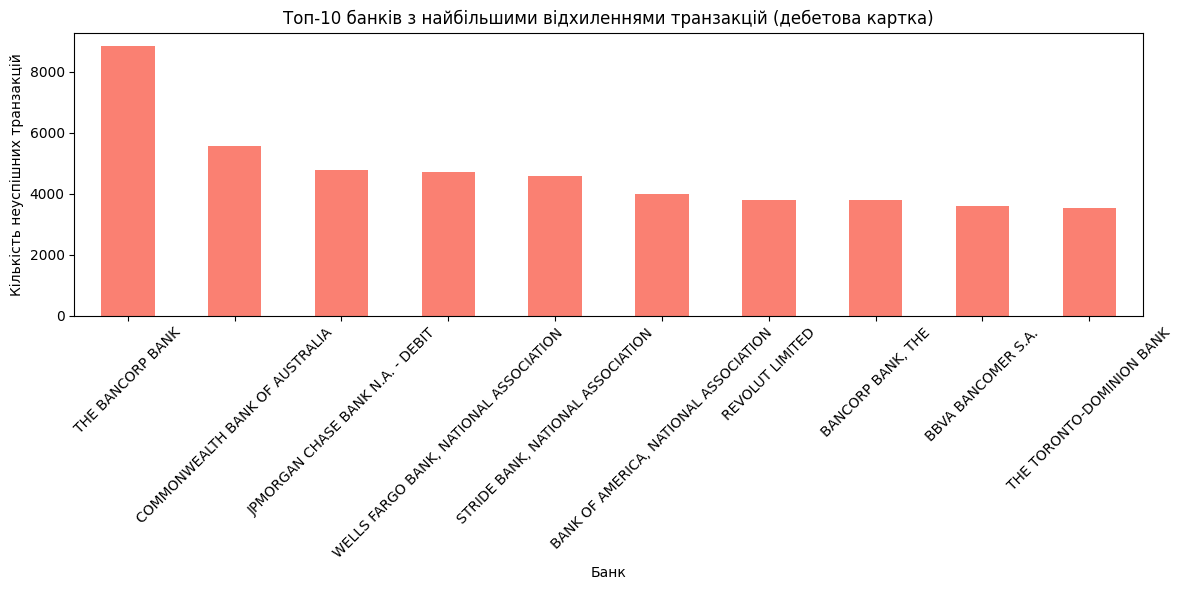

In [ ]:
df_failed_debit = df[(df['transaction_status'] == 0) & (df['card_type'] == 'DEBIT')]

bank_failures = df_failed_debit['bank_name'].value_counts()

plt.figure(figsize=(12, 6))
bank_failures.head(10).plot(kind='bar', color='salmon')
plt.title('Топ-10 банків з найбільшими відхиленнями транзакцій (дебетова картка)')
plt.xlabel('Банк')
plt.ylabel('Кількість неуспішних транзакцій')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

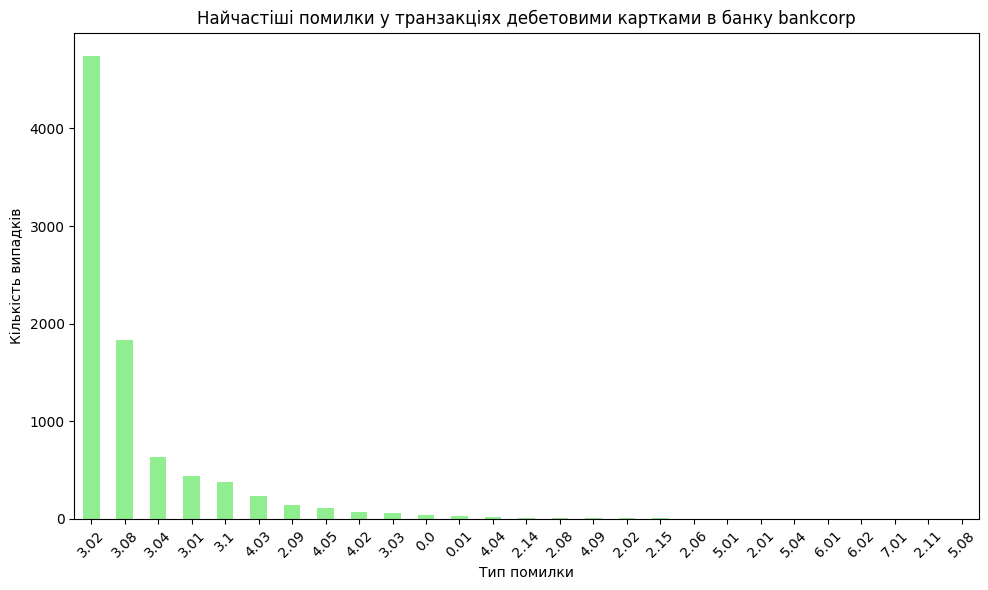

In [ ]:
df_failed_bankcorp_debit = df[(df['transaction_status'] == 0) & (df['card_type'] == 'DEBIT') & (df['bank_name'] == 'THE BANCORP BANK')]

error_counts = df_failed_bankcorp_debit['error_type'].value_counts()

plt.figure(figsize=(10, 6))
error_counts.plot(kind='bar', color='lightgreen')
plt.title('Найчастіші помилки у транзакціях дебетовими картками в банку bankcorp')
plt.xlabel('Тип помилки')
plt.ylabel('Кількість випадків')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

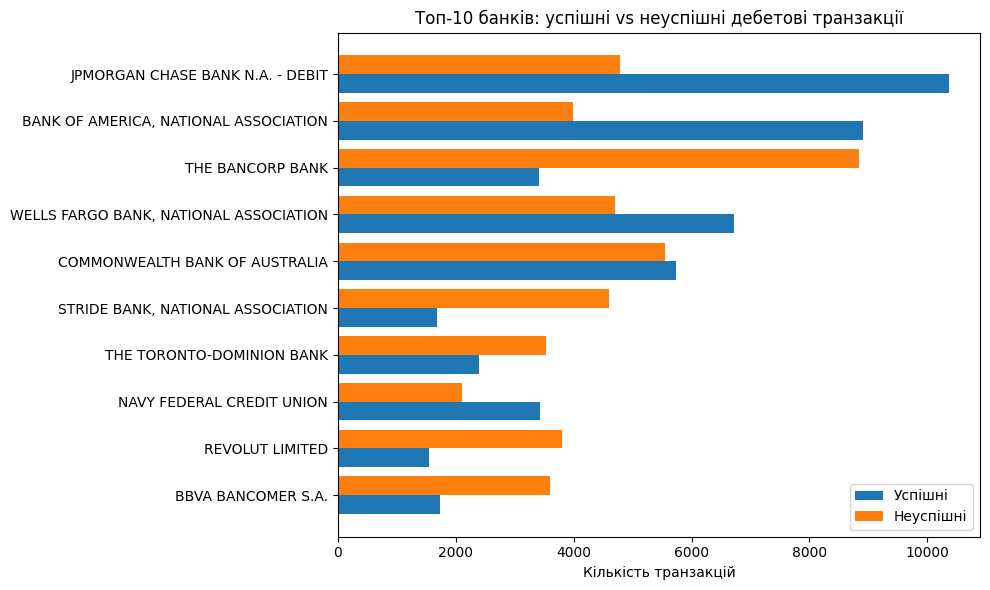

In [ ]:
df_debit = df[df["card_type"].str.upper() == "DEBIT"].copy()

grouped = df_debit.groupby(["bank_name", "transaction_status"]).size().unstack(fill_value=0)

grouped["total"] = grouped.get(1, 0) + grouped.get(0, 0)

top10 = grouped.sort_values("total", ascending=False).head(10)

y = np.arange(len(top10))

height = 0.4

plt.figure(figsize=(10, 6))
plt.barh(y + height/2, top10[1], height, label="Успішні")
plt.barh(y - height/2, top10[0], height, label="Неуспішні")

plt.yticks(y, top10.index)
plt.xlabel("Кількість транзакцій")
plt.title("Топ‑10 банків: успішні vs неуспішні дебетові транзакції")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

A very large number of unsuccessful transactions, compared to successful ones, in banks: THE BANCORP BANK, STRIDE BANK, THE TORONTO-DOMINION BANK, REVOULT LIMITED, BBVA BANCOMER S.A. And they deduced the most common error in unsuccessful debit transactions (in the top 10 banks)

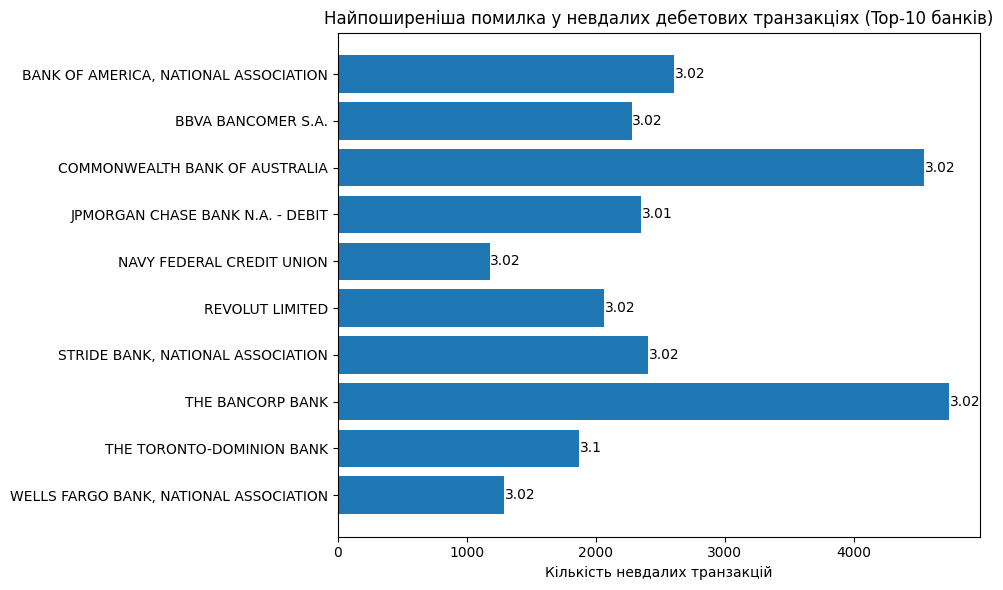

In [ ]:
df_failed_debit = df[
    (df["card_type"].str.upper() == "DEBIT") &
    (df["transaction_status"] == 0) &
    (df["bank_name"].isin(top10.index))
]

most_common_errors = (
    df_failed_debit
    .groupby(["bank_name", "error_type"])
    .size()
    .reset_index(name="count")
)

most_common_per_bank = (
    most_common_errors
    .sort_values(["bank_name", "count"], ascending=[True, False])
    .groupby("bank_name", as_index=False)
    .first()
)

plt.figure(figsize=(10, 6))
y = np.arange(len(most_common_per_bank))
plt.barh(y, most_common_per_bank["count"])
plt.yticks(y, most_common_per_bank["bank_name"])
plt.xlabel("Кількість невдалих транзакцій")
plt.title("Найпоширеніша помилка у невдалих дебетових транзакціях (Top‑10 банків)")

for i, (count, err) in enumerate(zip(most_common_per_bank["count"], most_common_per_bank["error_type"])):
    plt.text(count + 5, i, err, va="center")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

To delve into more detail about what problems arise related to rejected payments, for each bank we display the most common errors that exist.

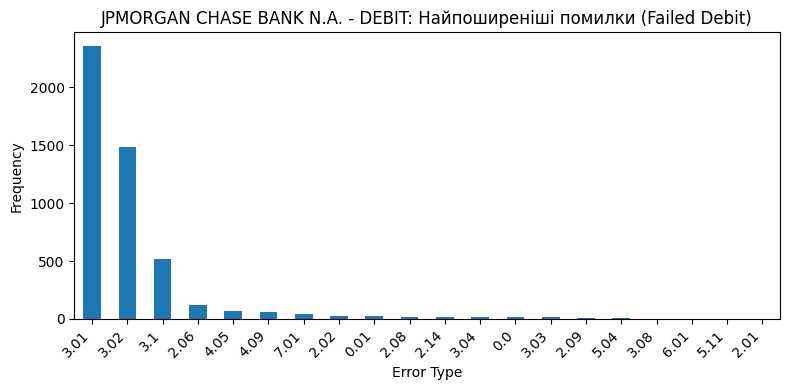

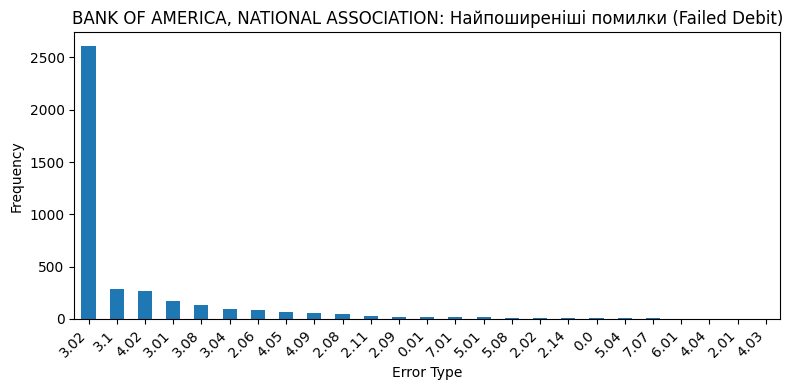

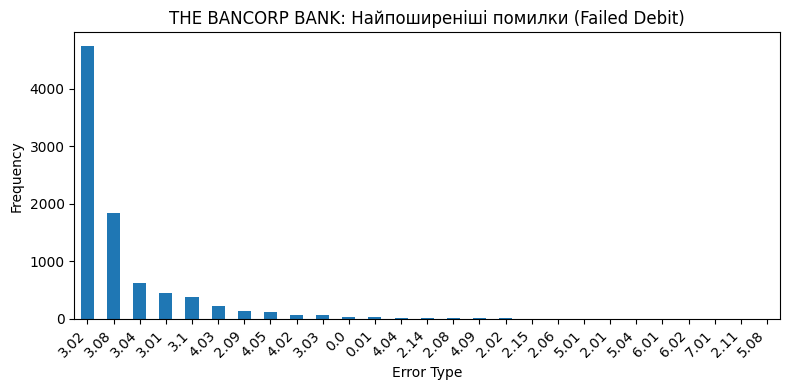

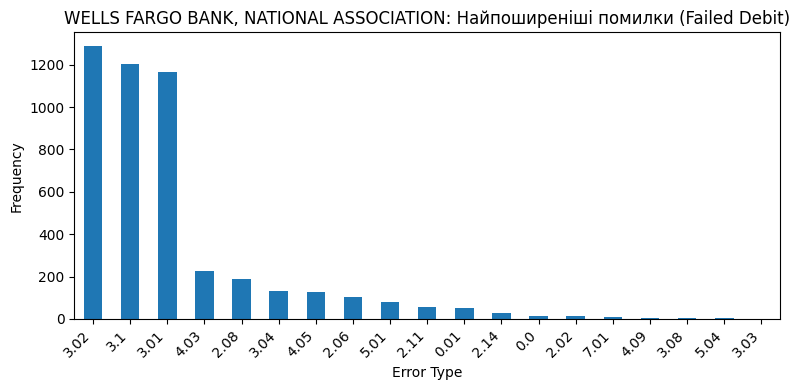

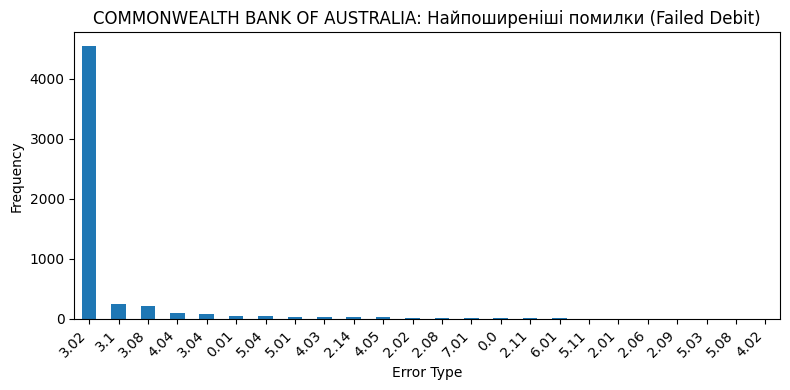

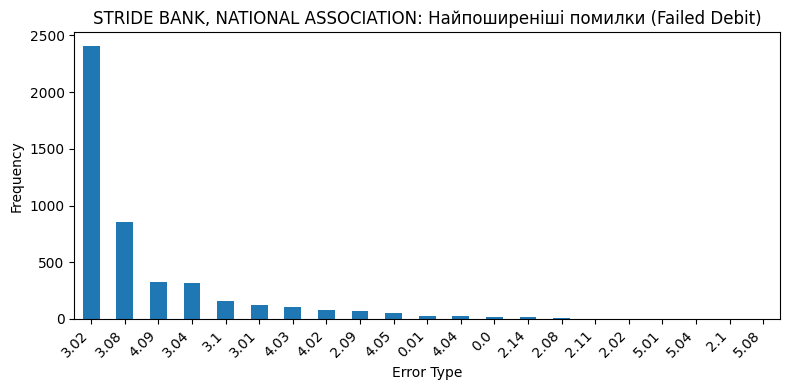

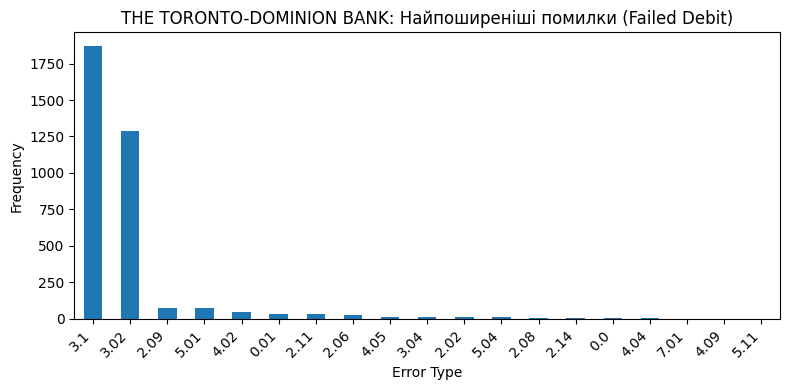

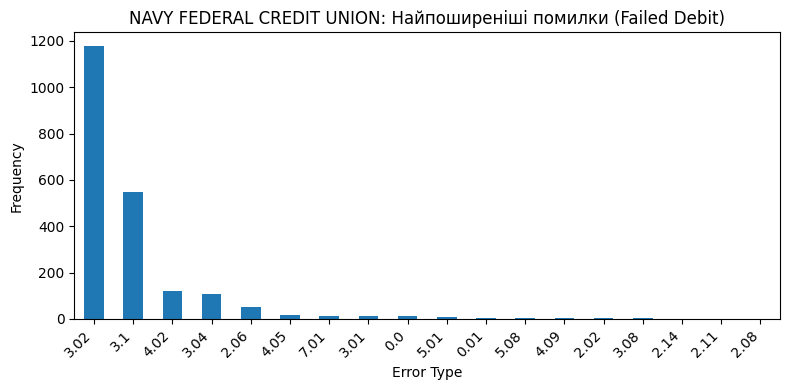

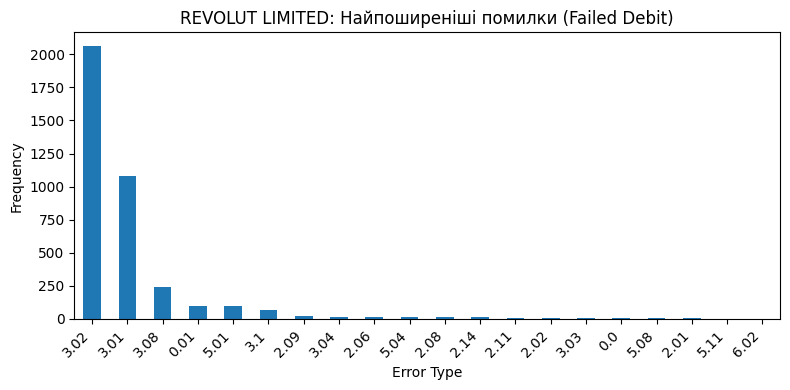

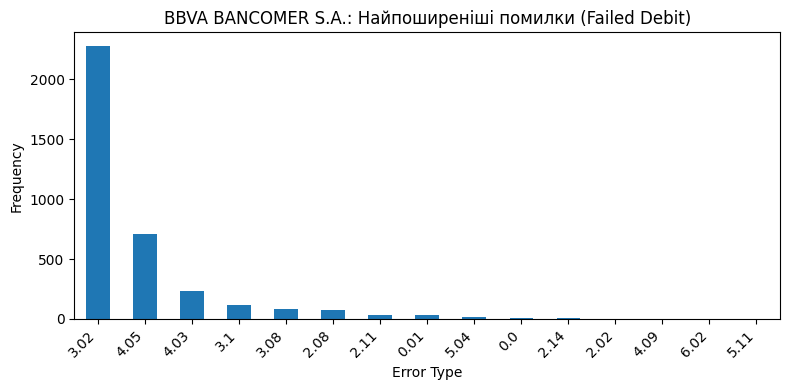

In [ ]:
df_failed_debit = df_debit[df_debit["transaction_status"] == 0]

for bank in top10.index:
    df_bank = df_failed_debit[df_failed_debit["bank_name"] == bank]
    
    if df_bank.empty:
        continue
    
    error_counts = df_bank["error_type"].value_counts()
    
    plt.figure(figsize=(8, 4))
    error_counts.plot(kind="bar")
    plt.title(f"{bank}: Найпоширеніші помилки (Failed Debit)")
    plt.xlabel("Error Type")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

The result of the study is the following banks: The Bank corb, Stride bank, revolut limited, in which we found a pattern that if error 3.08 is in second place, then in all banks on this list the number of unsuccessful transactions clearly exceeds the number of successful ones. 3.08 is an error on the part of the bank, which does not allow the user to make a transaction. It is this error that causes a significant excess of the number of unsuccessful transactions over successful ones. Therefore, our recommendation is to pay attention to this type of transaction. Errors 3.01 and 3.02 also often occur. They are quite common. 3.01-The card was blocked by the issuing bank (often due to exceeding the limits: for online payments, daily limit, number of transactions or 3DS authorization limit). 3.02-There are not enough funds in the account to complete the transaction.

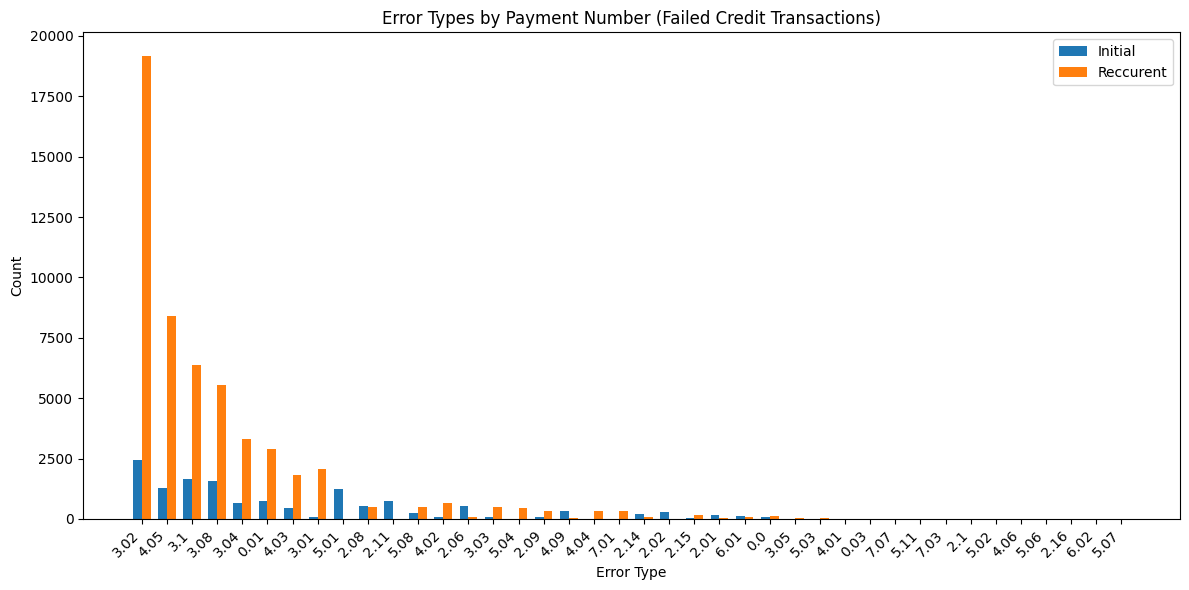

In [ ]:
df_failed_debit = df[(df['transaction_status'] == 0) & (df['card_type'].str.upper() == 'CREDIT')]

pivot = (
    df_failed_debit
    .groupby(['error_type', 'payment_number'])
    .size()
    .unstack(fill_value=0)
)

pivot['total'] = pivot.sum(axis=1)
pivot = pivot.sort_values('total', ascending=False).drop(columns='total')

labels = pivot.index.astype(str)
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, pivot.get('initial', 0), width, label='Initial')
plt.bar(x + width/2, pivot.get('reccurent', 0), width, label='Reccurent')

plt.title('Error Types by Payment Number (Failed Credit Transactions)')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

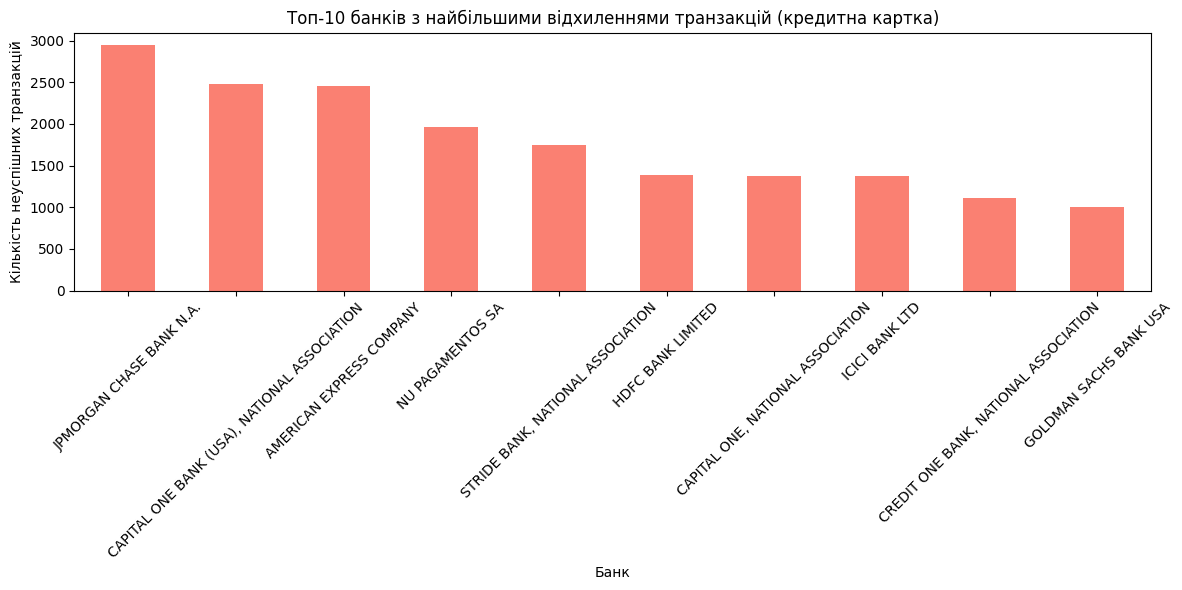

In [ ]:
df_failed_debit = df[(df['transaction_status'] == 0) & (df['card_type'] == 'CREDIT')]

bank_failures = df_failed_debit['bank_name'].value_counts()

plt.figure(figsize=(12, 6))
bank_failures.head(10).plot(kind='bar', color='salmon')
plt.title('Топ-10 банків з найбільшими відхиленнями транзакцій (кредитна картка)')
plt.xlabel('Банк')
plt.ylabel('Кількість неуспішних транзакцій')
plt.xticks(rotation=45)
plt.tight_layout()

# Показуємо графік
plt.show()

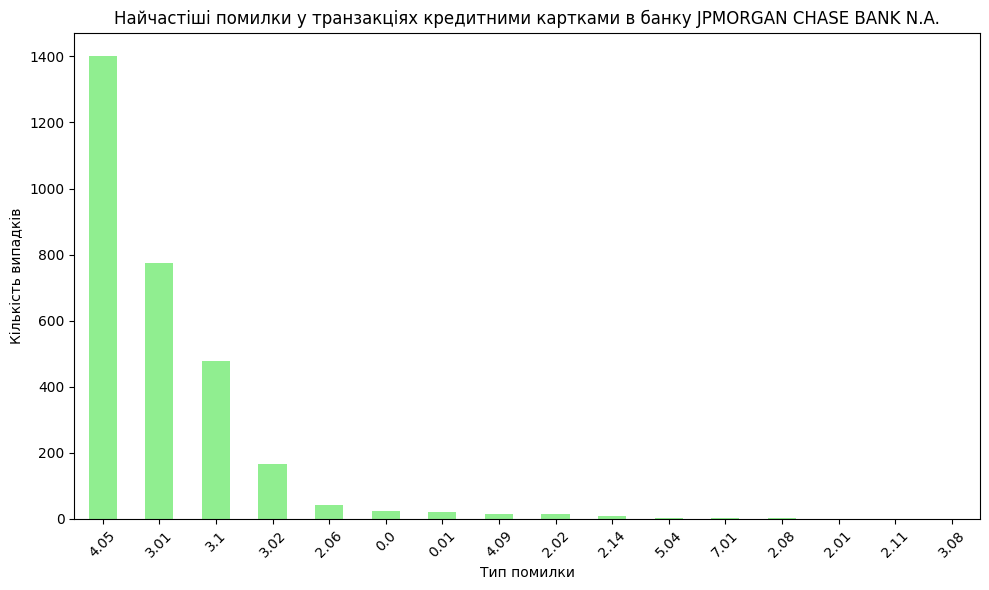

In [ ]:
df_failed_bankcorp_debit = df[(df['transaction_status'] == 0) & (df['card_type'] == 'CREDIT') & (df['bank_name'] == 'JPMORGAN CHASE BANK N.A.')]

error_counts = df_failed_bankcorp_debit['error_type'].value_counts()

plt.figure(figsize=(10, 6))
error_counts.plot(kind='bar', color='lightgreen')
plt.title('Найчастіші помилки у транзакціях кредитними картками в банку JPMORGAN CHASE BANK N.A.')
plt.xlabel('Тип помилки')
plt.ylabel('Кількість випадків')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

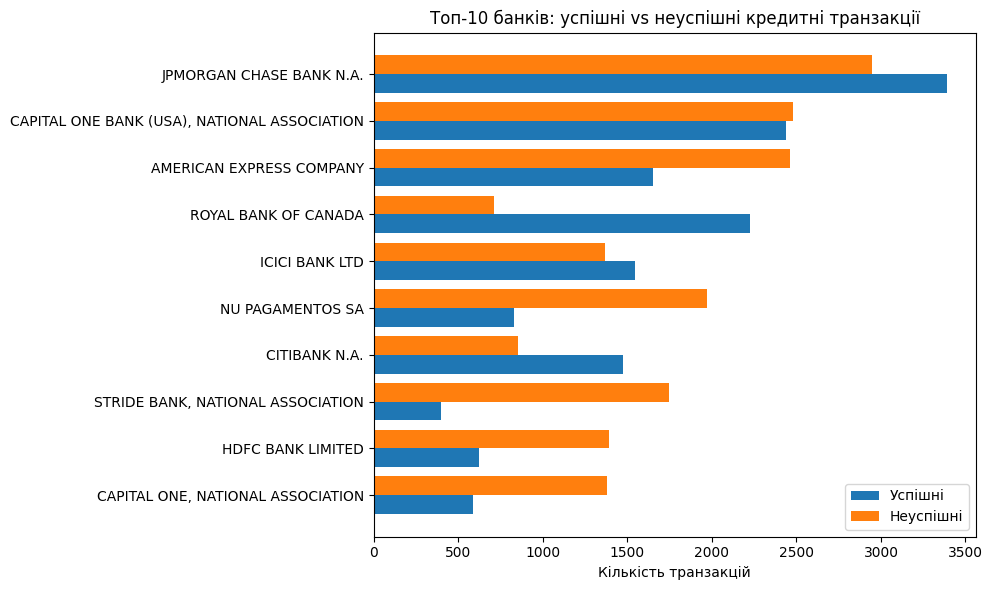

In [ ]:
df_debit = df[df["card_type"].str.upper() == "CREDIT"].copy()

grouped = df_debit.groupby(["bank_name", "transaction_status"]).size().unstack(fill_value=0)

grouped["total"] = grouped.get(1, 0) + grouped.get(0, 0)

top10 = grouped.sort_values("total", ascending=False).head(10)

y = np.arange(len(top10))

height = 0.4

plt.figure(figsize=(10, 6))
plt.barh(y + height/2, top10[1], height, label="Успішні")
plt.barh(y - height/2, top10[0], height, label="Неуспішні")

plt.yticks(y, top10.index)
plt.xlabel("Кількість транзакцій")
plt.title("Топ‑10 банків: успішні vs неуспішні кредитні транзакції")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

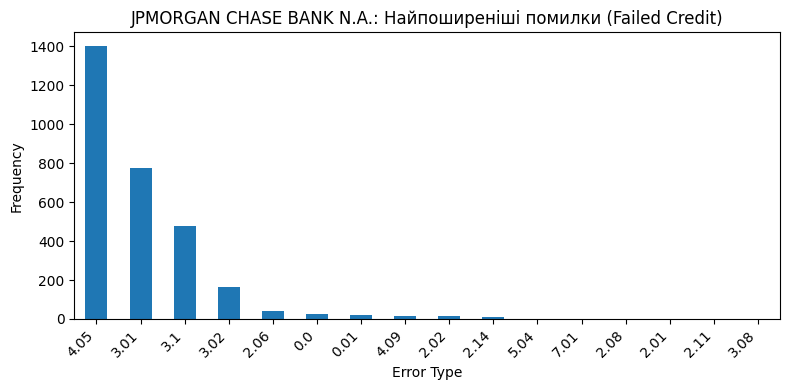

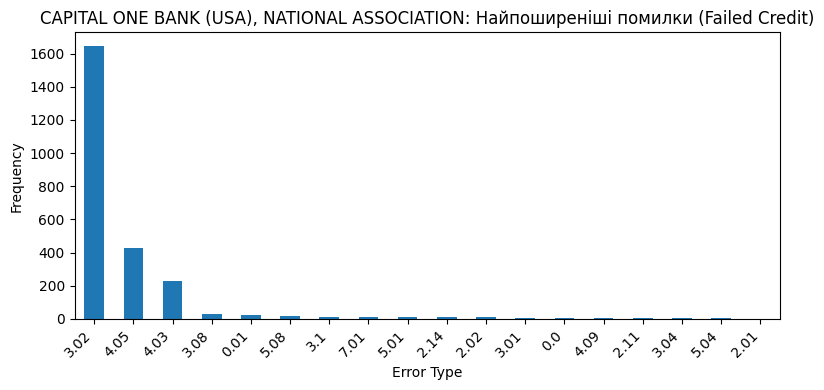

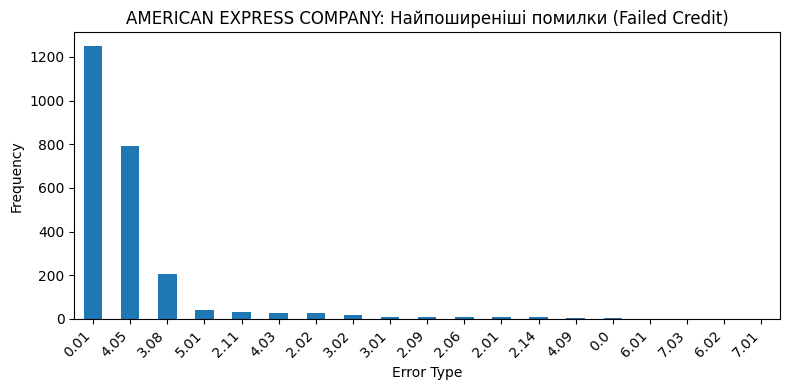

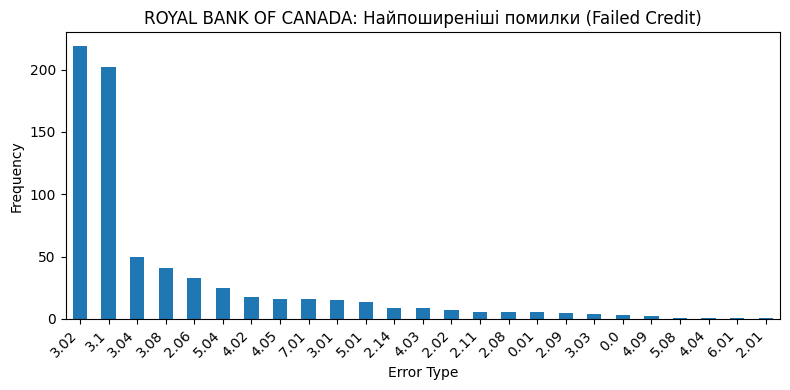

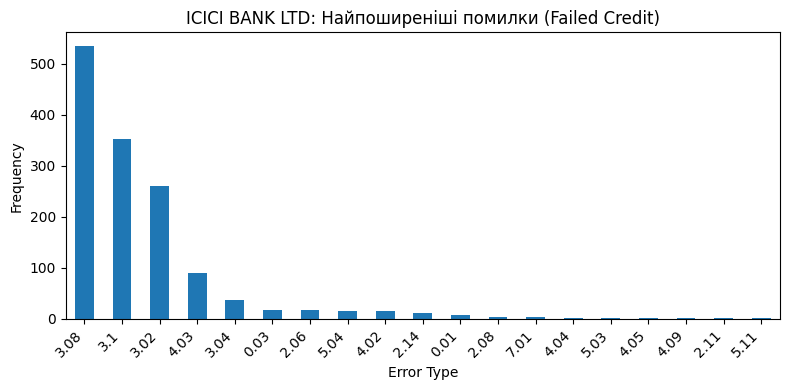

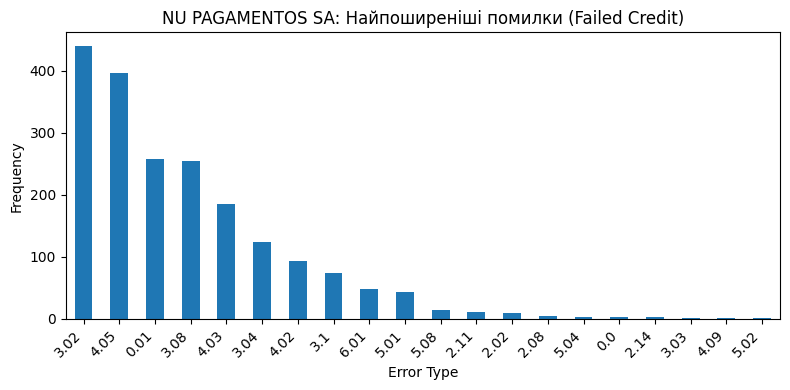

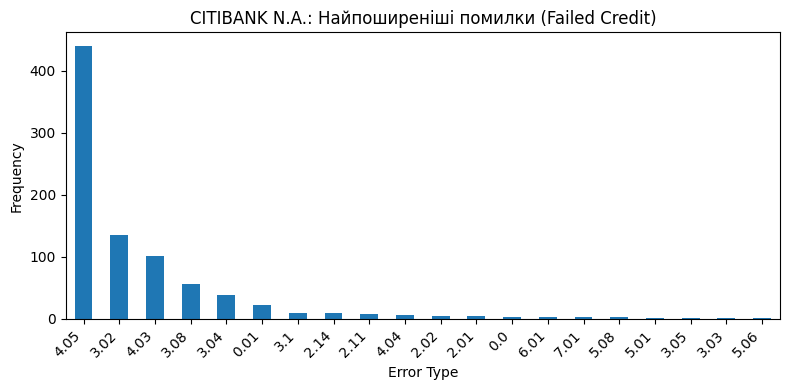

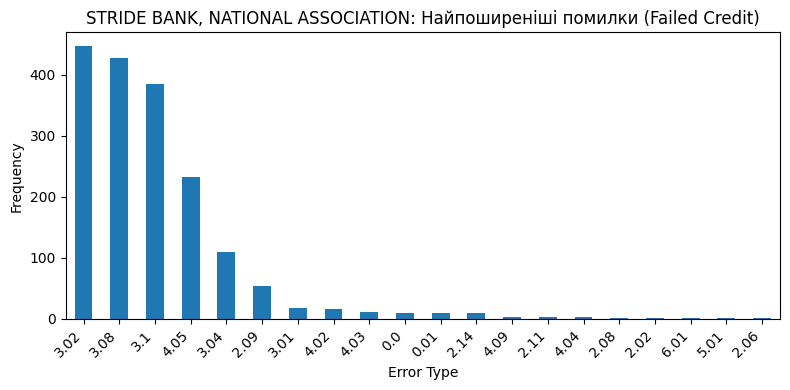

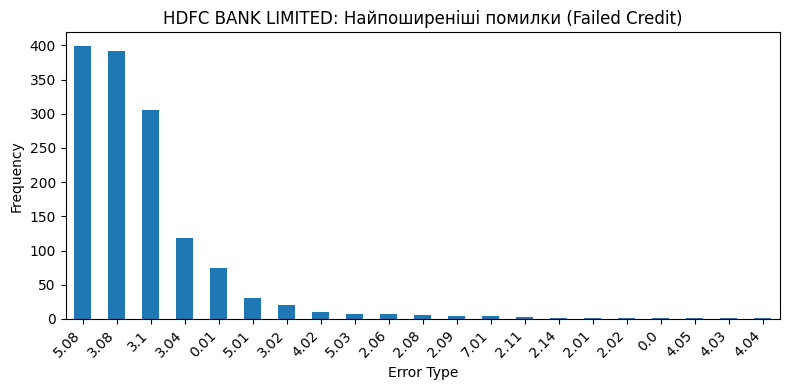

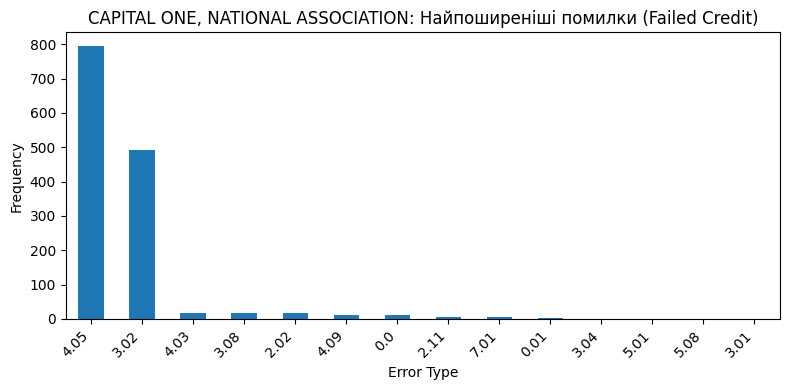

In [ ]:
df_failed_debit = df_debit[df_debit["transaction_status"] == 0]

for bank in top10.index:
    df_bank = df_failed_debit[df_failed_debit["bank_name"] == bank]
    
    if df_bank.empty:
        continue
    
    error_counts = df_bank["error_type"].value_counts()
    
    plt.figure(figsize=(8, 4))
    error_counts.plot(kind="bar")
    plt.title(f"{bank}: Найпоширеніші помилки (Failed Credit)")
    plt.xlabel("Error Type")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

While researching this segment, we identified an interesting pattern that we had not previously identified. This error 4.05 means that the bank assumes that this user may potentially be a fraudster, so it is worth paying attention to these banks CITIBANK, JPMORGAN, CAPITAL ONE BANK, when the user pays with a CREDIT card. We paid attention to these banks because the number of rejected transactions in them greatly exceeds the number of successful transactions.

As a result of the study, we found clear patterns that indicate systemic problems with payment processing in a number of banks. In particular, at The BankCorp, Stride Bank and Revolut Limited, error 3.08 (“Card is blocked”) ranks second in frequency and causes a significant excess of the number of unsuccessful transactions over successful ones. The most popular bank with the highest percentage of rejections is Sutton Bank (USA) — 85% of all debit transactions of the PREPAID type were rejected, the main reason for which is card blocking (error 3.01). In the credit card segment, we recorded that banks Citi, JPMorgan and Capital One often return error 4.05, signaling potential fraud risks. In general, the majority of rejections fall on debit cards (especially PREPAID), so the first recommendation is to work with the relevant banks to remove blocks and optimize transaction limits.